## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [53]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [54]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [55]:
diabetes_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [56]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols] = diabetes_data[cols].replace(0, np.nan)

**<font color='teal'> Check again</font>**

In [57]:
diabetes_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Check null values</font>**

In [58]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

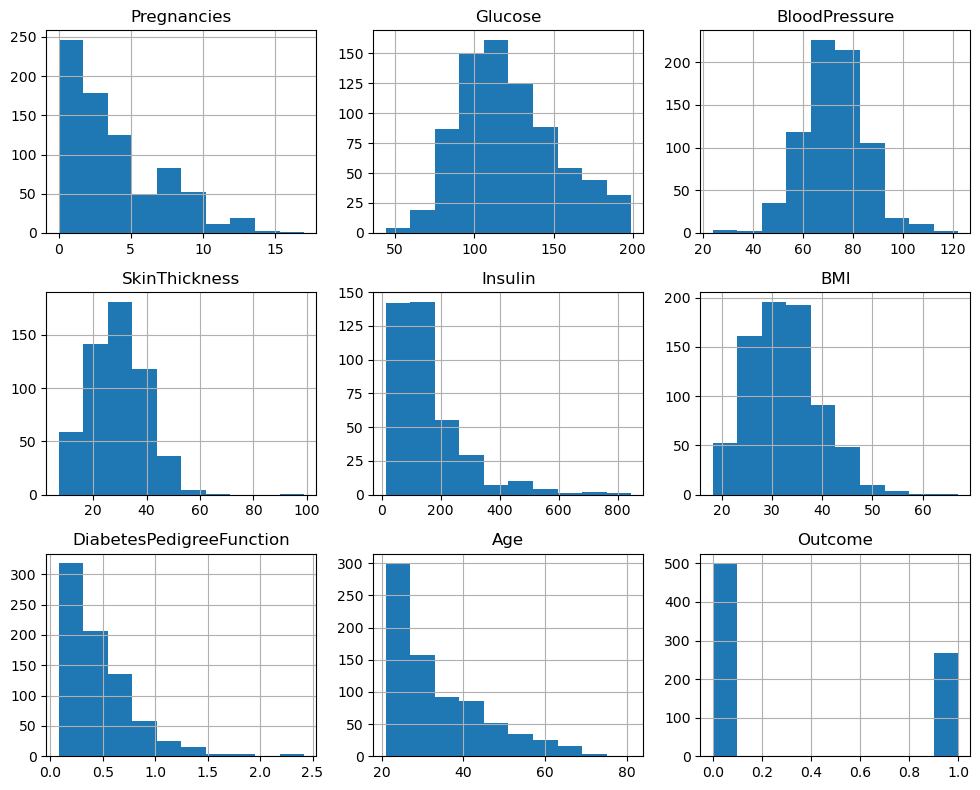

In [59]:
diabetes_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [60]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Check null values again</font>**

In [61]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

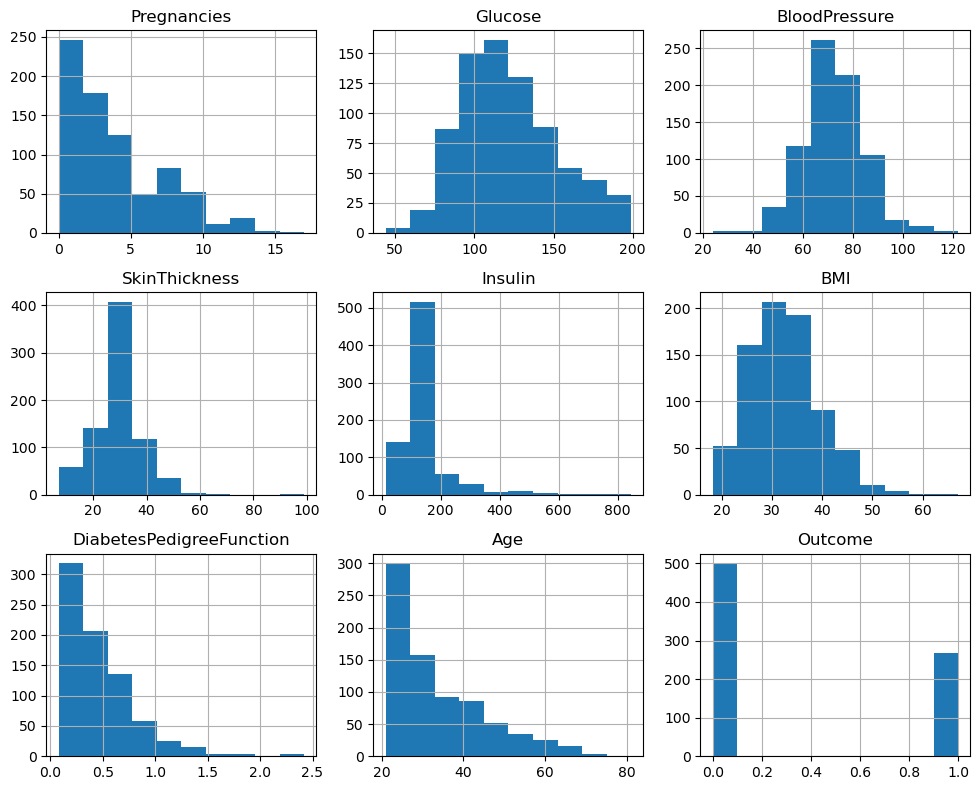

In [62]:
diabetes_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


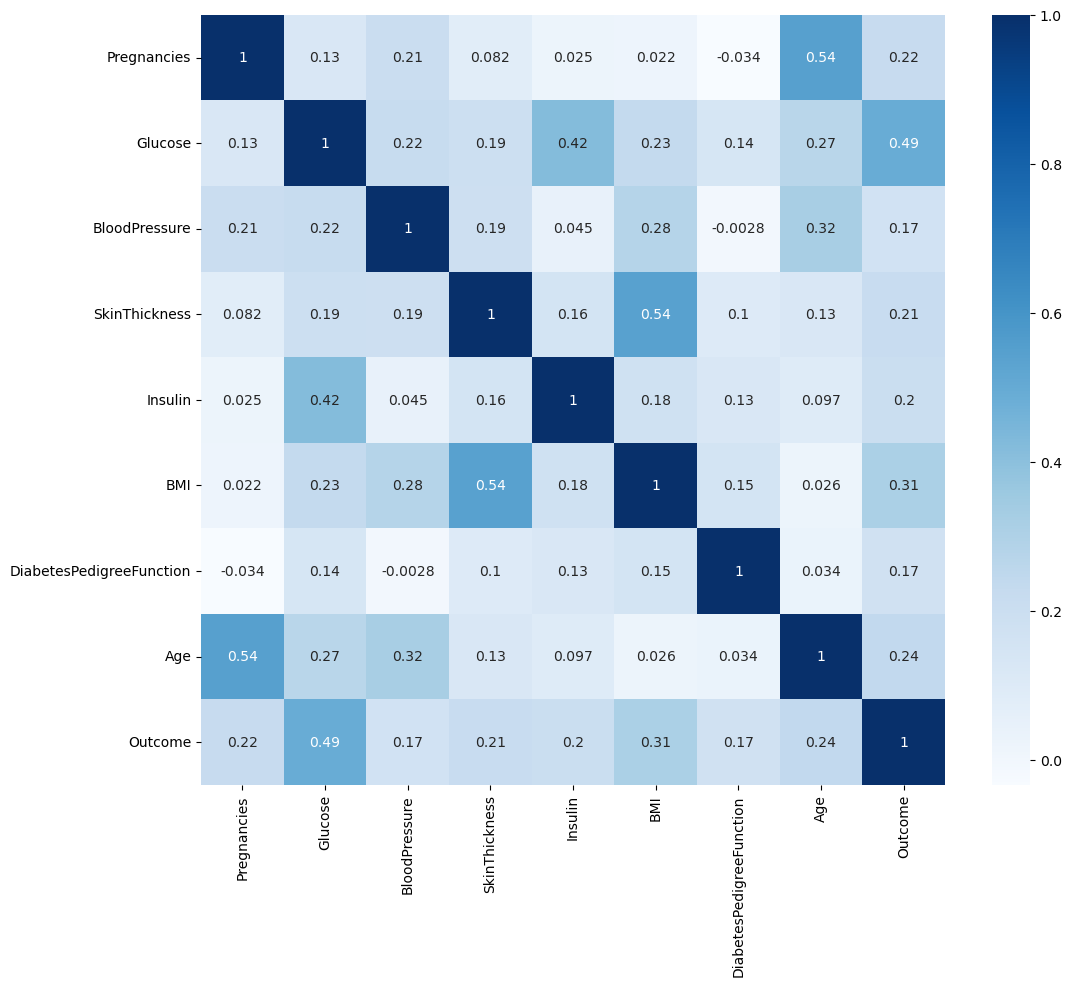

In [63]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [64]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-9, apply the KNearestNeighbor classifier to classify the the data.

In [67]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [68]:
for i in range(1,10):
    print(f"When n_neighbors is {i}, train score is {train_scores[i-1]}, test score is {test_scores[i-1]}")

When n_neighbors is 1, train score is 1.0, test score is 0.6666666666666666
When n_neighbors is 2, train score is 0.851024208566108, test score is 0.670995670995671
When n_neighbors is 3, train score is 0.8547486033519553, test score is 0.670995670995671
When n_neighbors is 4, train score is 0.8417132216014898, test score is 0.6926406926406926
When n_neighbors is 5, train score is 0.839851024208566, test score is 0.7012987012987013
When n_neighbors is 6, train score is 0.8230912476722533, test score is 0.683982683982684
When n_neighbors is 7, train score is 0.8342644320297952, test score is 0.7316017316017316
When n_neighbors is 8, train score is 0.8212290502793296, test score is 0.7359307359307359
When n_neighbors is 9, train score is 0.8268156424581006, test score is 0.7316017316017316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [69]:
max_index_train = train_scores.index(max(train_scores))
print(f"The index of the maximum value ({max(train_scores)}) is: {max_index_train}")

The index of the maximum value (1.0) is: 0


**<font color='teal'> When n_neighbors=1, that means each data point in the training set is its own neighbor. This results in a perfect prediction score of 1.0 for the training set because each data point correctly predicts itself.</font>**

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [70]:
max_index_test = test_scores.index(max(test_scores))
print(f"The index of the maximum value ({max(test_scores)}) is: {max_index_test}")

The index of the maximum value (0.7359307359307359) is: 7


Plot the train and test model performance by number of neighbors.

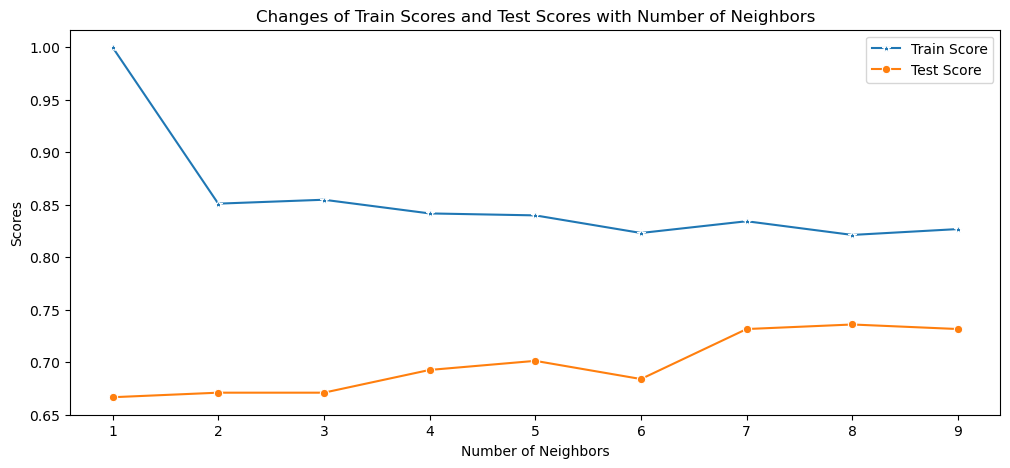

In [71]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')
plt.title('Changes of Train Scores and Test Scores with Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores');

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

**<font color='teal'> the best number of neighbors is 9 </font>**

In [72]:
from sklearn.metrics import confusion_matrix
# use n_neighbors=9 to predict test set 
y_test_pred = knn.predict(X_test_scaled)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

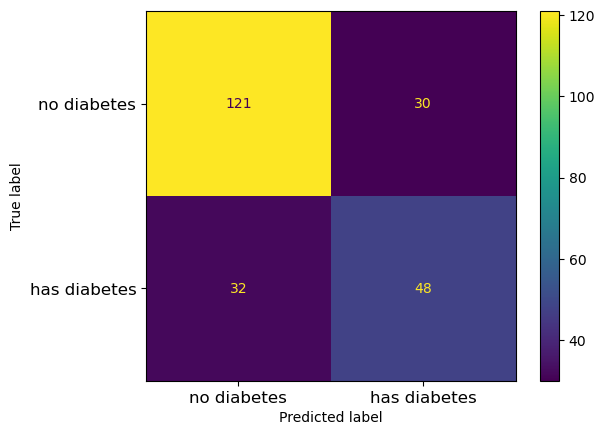

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred, labels = knn.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'has diabetes'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)
ax.set_yticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)

display_cm.plot(ax = ax);

**<font color='teal'> Print the classification report </font>**

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [77]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7951021114572516
Best Parameters: {'n_neighbors': 11}


Here you can see that the ideal number of n_neighbors for this model is 11 based on the grid search performed. 

**<font color='teal'> Let's see the result of test set using n_neighbors=11</font>**

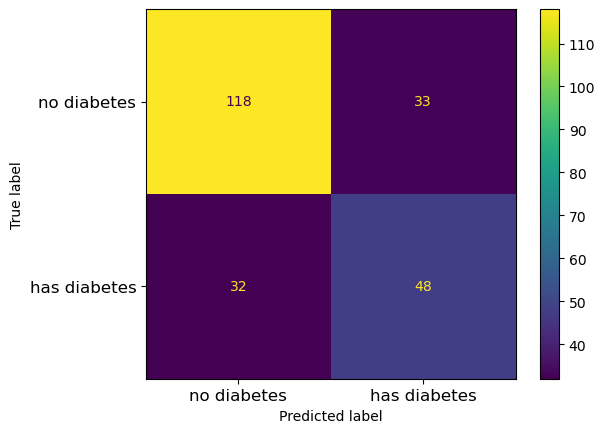

In [78]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled,y_train)
y_test_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_test_pred, labels = knn.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'has diabetes'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)
ax.set_yticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)

display_cm.plot(ax = ax);

In [80]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



**<font color='teal'> Compared to n_neighbors=11, n_neighbors=11 has lower precision on test set because the False Positive increased from 30 to 33. The recall score is the same.</font>**

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

**<font color='teal'> First, let's try RandomForestClassifier using default parameters.</font>**

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_test_pred = rf.predict(X_test_scaled)

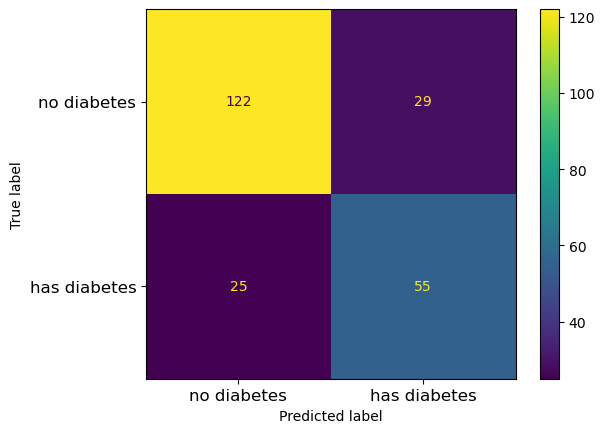

In [82]:
cm = confusion_matrix(y_test,y_test_pred, labels = rf.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'has diabetes'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)
ax.set_yticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)

display_cm.plot(ax = ax);

In [83]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.65      0.69      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.77      0.77       231



**<font color='teal'> Check max_depth of each tree with n_estimators=100</font>**

In [89]:
ind_trees = rf.estimators_
depth = [tree.tree_.max_depth for tree in ind_trees]
max(depth), min(depth)

(24, 11)

**<font color='teal'> The result is much better than KNN</font>**

**<font color='teal'> Now let's use GridSearch to optimize RandomForestClassifier</font>**

In [99]:
param_grid = {'n_estimators':np.arange(100,1100,100), 'max_depth': np.arange(10,30,5), 'max_features': ["sqrt", "log2"]}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [100]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7764797507788163
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 400}


**<font color='teal'> Let's try use these parameters on test set</font>**

In [101]:
rf = RandomForestClassifier(n_estimators=400, max_depth=40, max_features='log2')
rf.fit(X_train_scaled,y_train)
y_test_pred = rf.predict(X_test_scaled)

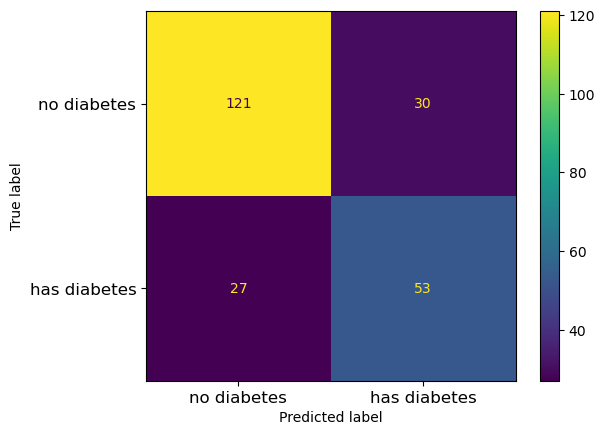

In [102]:
cm = confusion_matrix(y_test,y_test_pred, labels = rf.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'has diabetes'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)
ax.set_yticklabels(labels = ['no diabetes', 'has diabetes'],fontsize = 12)

display_cm.plot(ax = ax);

In [103]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



**<font color='teal'> The result shows the best parameters (n_estimators=400, max_depth=40, max_features='log2') get from GridSearchCV work even worse than default ones (n_estimators=100, max_features='sqrt'). This phenomenon tells us that the best parameters selected by GridSearchCV might not always generalize well to the test set or new, unseen data.</font>**